In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('2008_flights.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [5]:
# checks the dataset for any duplicate rows

df.duplicated().value_counts()

False    7009724
True           4
dtype: int64

With only 4 duplicate rows, it's possible these are valid, so I will leave them.

In [6]:
# changes all column names to lowercase titles

df.rename(columns=lambda x: x.lower(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
year                 int64
month                int64
dayofmonth           int64
dayofweek            int64
deptime              float64
crsdeptime           int64
arrtime              float64
crsarrtime           int64
uniquecarrier        object
flightnum            int64
tailnum              object
actualelapsedtime    float64
crselapsedtime       float64
airtime              float64
arrdelay             float64
depdelay             float64
origin               object
dest                 object
distance             int64
taxiin               float64
taxiout              float64
cancelled            int64
cancellationcode     object
diverted             int64
carrierdelay         float64
weatherdelay         float64
nasdelay             float64
securitydelay        float64
lateaircraftdelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [7]:
# creates a copy of the dataframe before beginning exploratory analysis

df2 = df.copy()

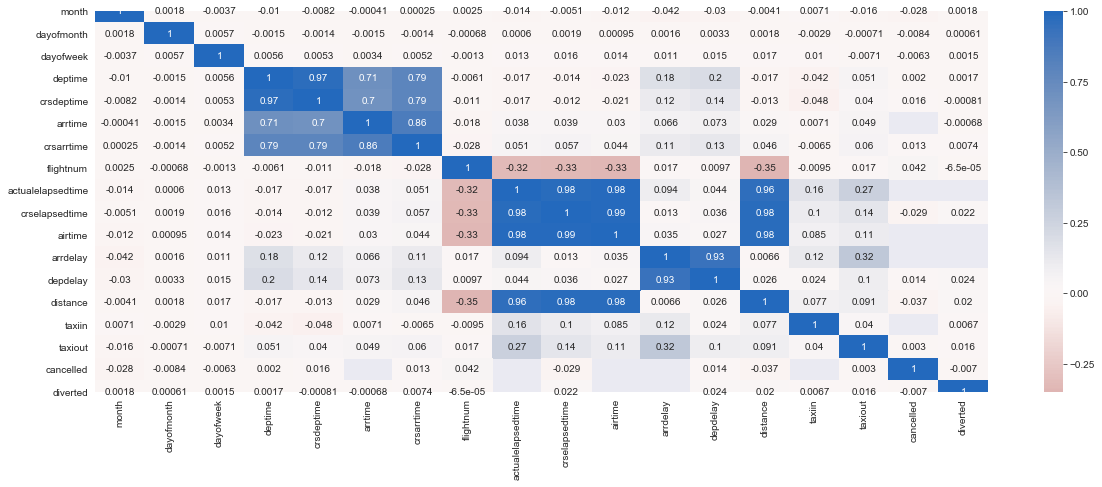

In [9]:
# plots a correlation heatmap to look at any potential correlation between variables (nothing surprising discovered here)

num_vars = ['month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime', 
            'arrtime', 'crsarrtime', 'flightnum', 'actualelapsedtime', 'crselapsedtime', 'airtime', 
            'arrdelay', 'depdelay', 'distance', 'taxiin', 'taxiout', 'cancelled', 'diverted']

plt.figure(figsize = [20, 7])
sns.heatmap(df2[num_vars].corr(), annot=True, cmap='vlag_r', center=0);

With the information provided in this dataset, it looks like there are many questions that can be answered. I initially brought in five years of data, but the memory footprint was over 5gb, figures and code cells were taking 30+ minutes to run and my MacBook Pro became a space heater. So for the sake of memory and time, I've limited this analysis to one year of data, 2008.

I first wanted to take a quick look at the cancellation codes, to see what factors caused the most cancellations of flights in 2008.

In [10]:
df2.cancellationcode.value_counts()

B    54904
A    54330
C    28188
D       12
Name: cancellationcode, dtype: int64

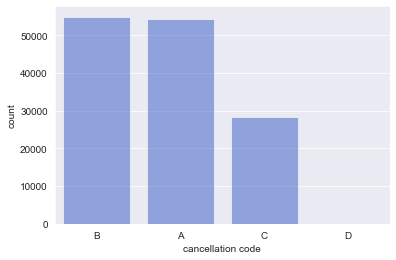

In [11]:
# creates a countplot for cancellations based on reason

sns.countplot(data=df2, x='cancellationcode', alpha=0.6, color='royalblue', order=df2['cancellationcode'].value_counts().index)
plt.xlabel('cancellation code');
plt.rcParams['figure.figsize']=(9,4);

- A = Carrier Cancelled Flight
- B = Weather Cancellation
- C = National Air System Cancellation
- D = Security Cancellation

In [12]:
# replaces the 'A, B, C, D' in the 'cancellationcode' column with the corresponding cancellation reason & verifies the change

df2['cancellationcode'] = df2['cancellationcode'].replace({'A':'Carrier', 'B':'Weather', 'C':'National Air System', 'D':'Security'})
df2.cancellationcode.value_counts()

Weather                54904
Carrier                54330
National Air System    28188
Security                  12
Name: cancellationcode, dtype: int64

I will come back to cancellations later in the exploration, but I also wanted to take a look at the distribution of total flights per carrier.

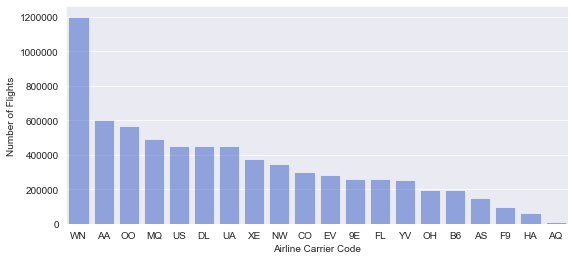

In [13]:
# plots number of flights per carrier code in descending order

sns.countplot(data=df2, x='uniquecarrier', alpha=0.6, color='royalblue', order=df2['uniquecarrier'].value_counts().index)
plt.xlabel('Airline Carrier Code')
plt.ylabel('Number of Flights')
plt.rcParams['figure.figsize']=(8,4);

In [14]:
df2.uniquecarrier.value_counts()

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
EV     280575
9E     262208
FL     261684
YV     254930
OH     197607
B6     196091
AS     151102
F9      95762
HA      61826
AQ       7800
Name: uniquecarrier, dtype: int64

WN (Southwest) flew significantly more flights than any other carrier in 2008 by a margin of nearly 2:1! That piece of information made me very curious regarding the average distance/flight time of a Southwest flight when compared to other airlines, to see if they are just flying a larger number of significantly shorter routes than the other airlines, which is my assumption based on my limited knowledge of their flight routes and business operation.

In [15]:
# creates a new dataframe that only has flight information for Southwest Airlines

southwest = df2[df2['uniquecarrier'] == 'WN']

/Users/mattb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mattb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


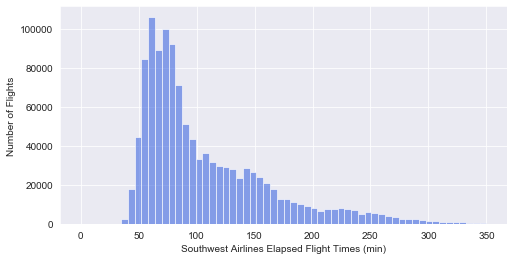

In [16]:
# plots a histogram of the actual elapsed time of Southwest Airlines 

plt.hist(data=southwest, x='actualelapsedtime', bins=60, alpha=0.6, color='royalblue', range=[0, 350])
plt.xlabel('Southwest Airlines Elapsed Flight Times (min)')
plt.ylabel('Number of Flights')
plt.rcParams['figure.figsize']=(8,4);

In [17]:
# calculates the average elapsed time of Southwest Airlines flights 

sw_flighttime_mean = southwest.actualelapsedtime.mean()
sw_flighttime_mean

107.19328492195287

According to the data from this dataset, the average actual elapsed time of a Southwest Airlines flight in 2008 was 107 minutes. The histogram clearly shows a very strong right skew, with the majority of flights lasting less than two hours. How do these flight durations match up to the rest of the airlines in this dataset?

In [18]:
# creates a separate dataframe for flight data from all other airlines, excluding Southwest

other_airlines = df2[df2['uniquecarrier'] != 'WN']
other_airlines_flighttime_mean = other_airlines.actualelapsedtime.mean()
other_airlines_flighttime_mean

131.53749057447286

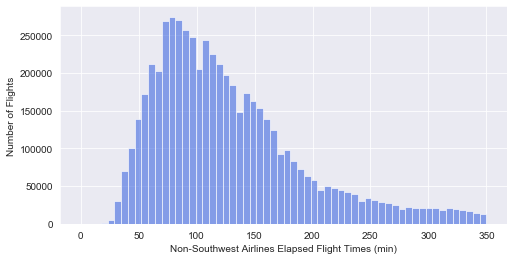

In [19]:
# plots a histogram of actual elapsed time of flights from all other airlines

plt.hist(data=other_airlines, x='actualelapsedtime', bins=60, alpha=0.6, color='royalblue', range=[0, 350])
plt.xlabel('Non-Southwest Airlines Elapsed Flight Times (min)')
plt.ylabel('Number of Flights')
plt.rcParams['figure.figsize']=(12,5);

In [20]:
# calculates the average actual elapsed flight time of all other airlines

other_airlines.actualelapsedtime.mean()

131.53749057447286

In [21]:
# difference in average actual elapsed flight time between Southwest and all other airlines

other_airlines_flighttime_mean - sw_flighttime_mean

24.34420565251999

While still fairly right skewed, we see a significantly more even distribution of actual elapsed flight times from the histogram for non-Southwest Airlines flights. The average flight time for all other airlines is 131.5 minutes, which is 24.3 minutes longer than the average Southwest Airlines flight. While this shows us the flight time, I'm still curious to know the actual distance the average Southwest Airlines flight stacks up to other airlines in the dataset, so let's take a look at that information using a similar method to how we determined flight time.

To do this, we'll be using the 'distance' variable from the dataset, which is defined as distance between departure and arrival airports in miles.

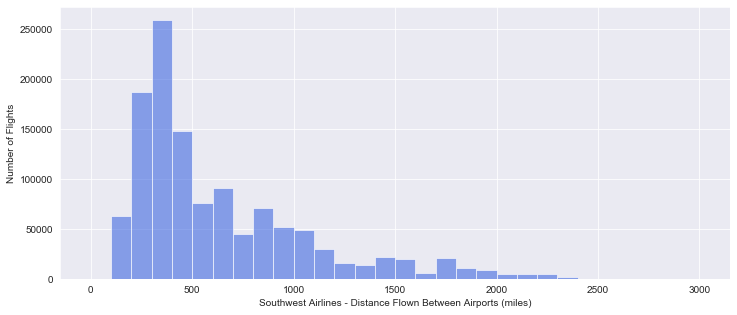

In [22]:
# plots a histogram of the distances of Southwest flights

plt.hist(data=southwest, x='distance', bins=30, alpha=0.6, color='royalblue', range=[0,3000])
plt.xlabel('Southwest Airlines - Distance Flown Between Airports (miles)')
plt.ylabel('Number of Flights')
plt.rcParams['figure.figsize']=(12,5);

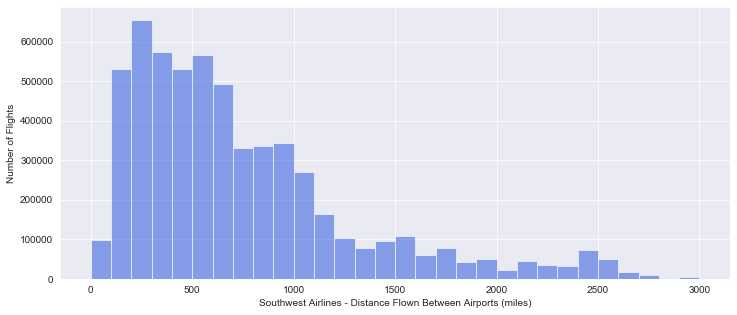

In [23]:
# plots a histogram of the distances of all non-Southwest flights

plt.hist(data=other_airlines, x='distance', bins=30, alpha=0.6, color='royalblue', range=[0,3000])
plt.xlabel('Southwest Airlines - Distance Flown Between Airports (miles)')
plt.ylabel('Number of Flights')
plt.rcParams['figure.figsize']=(12,5);

In [24]:
# calculates the average distance of non-Southwest flights

other_airlines.distance.mean()

745.2629099234948

In [25]:
# calculates the average distance of Southwest flights

southwest.distance.mean()

635.1615180810714

In [26]:
other_airlines.distance.mean() - southwest.distance.mean()

110.10139184242337

Southwest Airlines' average distance flown was 635 miles, compared to all other airlines' average distance of 745 miles, a difference of 110 miles. The histogram really shows the disparity in flight ranges of Southwest and the other airlines; the bulk of Southwest flights were <400 miles in distance, with few flights beyond the 1500 mile range. The other airlines were, again, much more evenly distributed, with the bulk of the other airlines' flights falling between 200-1000 miles, with many flights >1500 miles.

It appears the assumption was correct that Southwest flies significantly more shorter-route flights than the other airlines.

Next, I was curious to see how the number of flights flucuated over the course of the year:

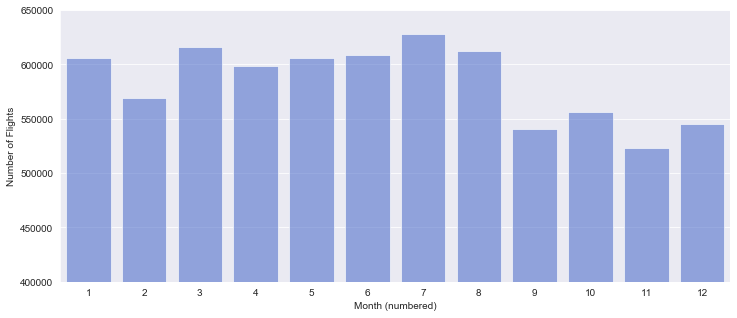

In [27]:
# plots the number of flights per month 
# (I set the y range here to a minimum of 40,000 to accentuate the differences between months since it was difficult to see with a minimum of 0)

sns.countplot(data=df2, x='month', alpha=0.6, color='royalblue')
plt.xlabel('Month (numbered)')
plt.ylabel('Number of Flights')
plt.ylim(400000, 650000)
plt.rcParams['figure.figsize']=(10,5);

Predictably, there are more flights in the summer months. However, it was surprising to see the large number of flights in January and March and such a low number of flights in November and December, peak holiday travel months.

Additionally, I wanted to look at flight cancellation reasons compared to month, as well. I predicted that there would be primarily weather-related cancellations in the winter & summer months.

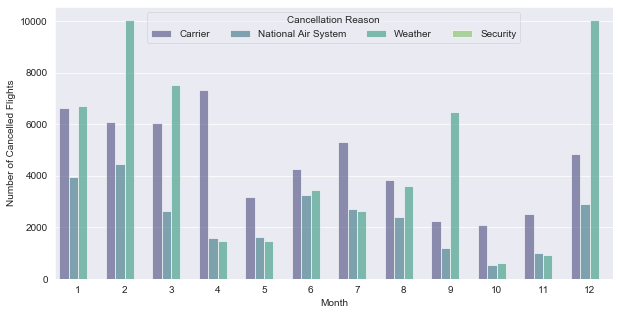

In [28]:
# plots a clustered bar chart comparing number & reason for flight cancellations by month

sns.countplot(data=df2, x='month', hue='cancellationcode', alpha=0.6, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Flights')
plt.legend(title='Cancellation Reason', loc=9, ncol=4, framealpha=.5)
plt.rcParams['figure.figsize']=(20,6);

As expected, the largest amount of flight cancellations in the winter months (December, January, February, and March (months 1, 2, 3 & 12) were primarily due to weather-related cancellations. Two curiosities appear in this plot, though; the significantly large amount of flight cancellations due to carrier cancellations in April, and the large number of weather-related cancellations in September. 

With the breakdown of reasons for flight cancellations plotted, I also just wanted to see an overall number of cancellations by month.

In [29]:
# creates a separate dataframe containing only cancelled flights

cancelled_flights = df2[df2['cancelled'] == 1]

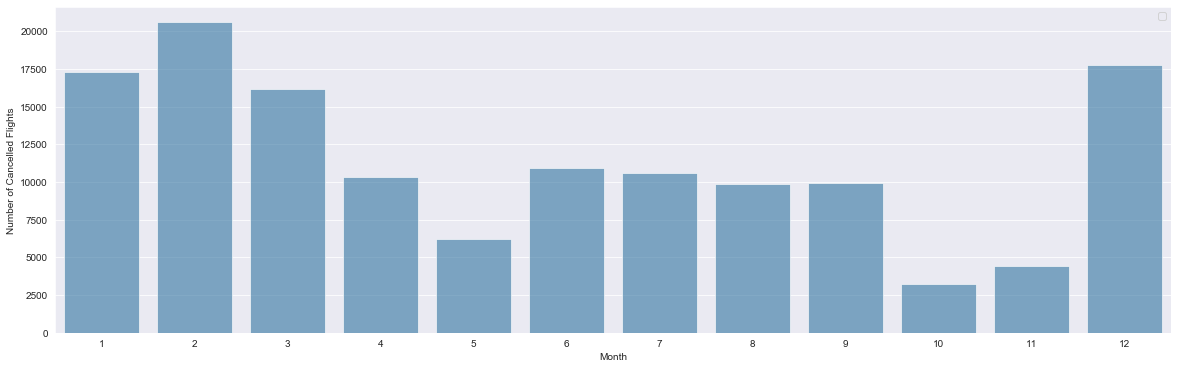

In [30]:
# plots the total number of cancelled flights by month

sns.countplot(data=cancelled_flights, hue='cancelled', x='month', alpha=0.6)
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Flights')
plt.legend('')
plt.rcParams['figure.figsize']=(15,5);

Unsurprisingly, the majority of flights are cancelled in the Winter and Summer months.

I was also curious to find 10 busiest orignating flight airports, as well as the top 10 destination airports:

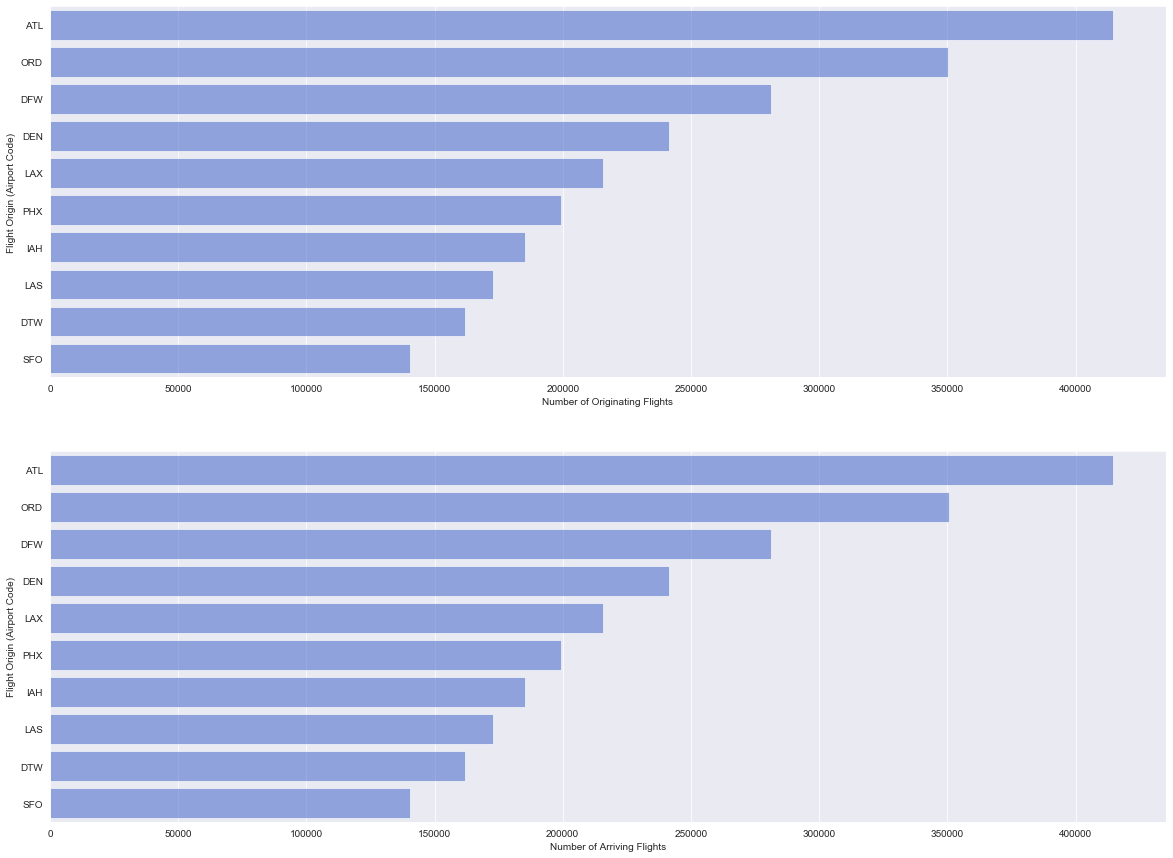

In [31]:
# plots the busiest 10 aiports, ranked by number of originating flights & arriving flights

plt.figure(figsize = [20, 15])

plt.subplot(2, 1, 1)
sns.countplot(data=df2, y='origin', alpha=0.6, color='royalblue', order=df2['origin'].value_counts().head(10).index)
plt.xlabel('Number of Originating Flights')
plt.ylabel('Flight Origin (Airport Code)')
plt.rcParams['figure.figsize']=(15,5);

plt.subplot(2, 1, 2)
sns.countplot(data=df2, y='dest', alpha=0.6, color='royalblue', order=df2['dest'].value_counts().head(10).index)
plt.xlabel('Number of Arriving Flights')
plt.ylabel('Flight Origin (Airport Code)')
plt.rcParams['figure.figsize']=(15,5);

These charts look almost identical, both in the top 10 airports and number of flights. As such, I want to verify the exact counts:

In [32]:
df2['origin'].value_counts().head(10)

ATL    414513
ORD    350380
DFW    281281
DEN    241443
LAX    215608
PHX    199408
IAH    185172
LAS    172876
DTW    161989
SFO    140587
Name: origin, dtype: int64

In [33]:
df2['dest'].value_counts().head(10)

ATL    414521
ORD    350452
DFW    281401
DEN    241470
LAX    215685
PHX    199416
IAH    185160
LAS    172871
DTW    162000
SFO    140579
Name: dest, dtype: int64

The numbers *are* different, but are also extremely close! Interesting!

Which of the top five airlines (in terms of overall number of flights) serve the top five originating destination airports?

In [34]:
# returns the top 5 airlines based on overall number of flights

#df.uniquecarrier.value_counts().head()

In [35]:
# MADE REDUNDANT BY THE HUE_ORDER IN COUNTPLOT
#creates a new dataframe containing only the data for the top five airlines

#array = ['WN', 'AA', 'OO', 'MQ', 'US']
#top_airlines = df.loc[df['uniquecarrier'].isin(array)]

#top_airlines.uniquecarrier.value_counts()

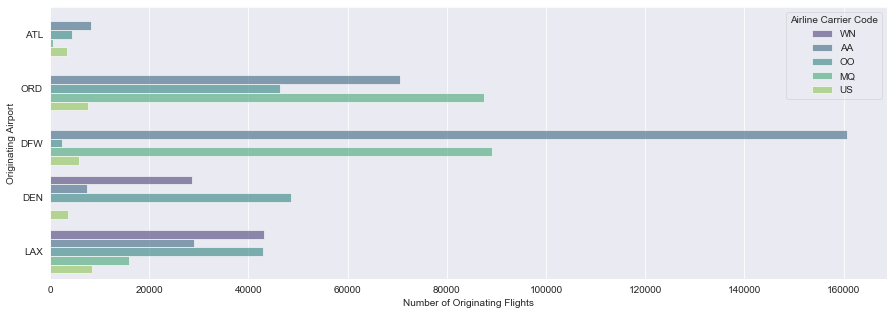

In [36]:
# plots a clustered bar chart showing the distribution of the top five airlines at the top five airports

sns.countplot(data=df2, y='origin', hue='uniquecarrier', alpha=0.6, palette='viridis', 
              hue_order=df2['uniquecarrier'].value_counts().head().index, order=df2['origin'].value_counts().head().index)
plt.ylabel('Originating Airport')
plt.xlabel('Number of Originating Flights')
plt.legend(title='Airline Carrier Code', loc=1, ncol=1, framealpha=.5)
plt.rcParams['figure.figsize']=(20,7);

Interestingly enough, though ATL is the origin airport with the highest number of originating flights overall, it serves an extremely low number of the top five airlines.

How do taxi times for departures & arrivals look at the five busiest airports?

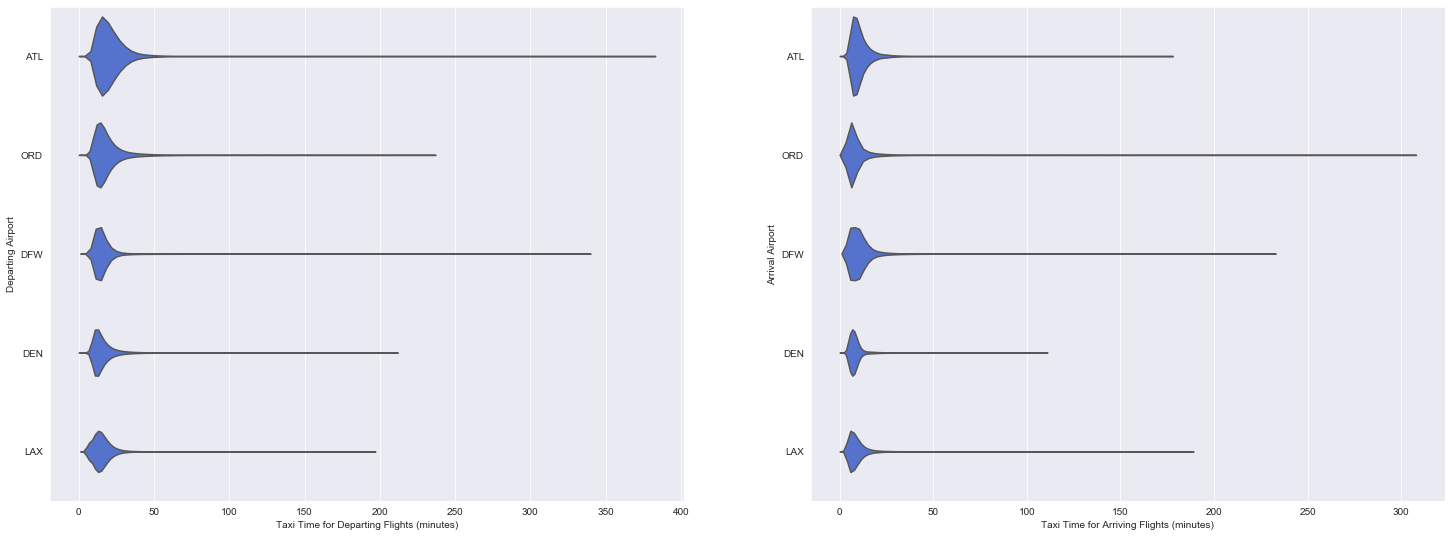

In [37]:
plt.figure(figsize = [25, 20])

plt.subplot(2, 2, 1)
sns.violinplot(data=df2, y='origin', x='taxiout', scale='count', inner=None, color='royalblue', cut=0, order=df2['origin'].value_counts().head().index)
plt.ylabel('Departing Airport')
plt.xlabel('Taxi Time for Departing Flights (minutes)')
plt.rcParams['figure.figsize']=(15,8);

plt.subplot(2, 2, 2)
sns.violinplot(data=df2, y='dest', x='taxiin', scale='count', inner=None, cut=0, color='royalblue', order=df2['dest'].value_counts().head().index)
plt.ylabel('Arrival Airport')
plt.xlabel('Taxi Time for Arriving Flights (minutes)')
plt.rcParams['figure.figsize']=(15,8);

In [38]:
departure_taxi_mean = df2.taxiout.mean()
departure_taxi_mean

16.453045177492882

In [39]:
arrival_taxi_mean = df2.taxiin.mean()
arrival_taxi_mean

6.860851704974527

Not entirely surprising information here. The busiest airport, ATL, having the most flights obviously has more flights taxiing for departure, thus a larger count. ATL also has more outliers than the other four airports (likely due to higher volume of flights), and longer taxiing times, in general. LAX appears to have the shortest taxi times on departure of the five busiest airports. 

For arrivals, DFW appears to have longer taxi times than the other airports. Orlando has the most outliers for arrival taxi times, and LAX once again appears to have the shortest taxi times.

How do departure and arival delays compare?

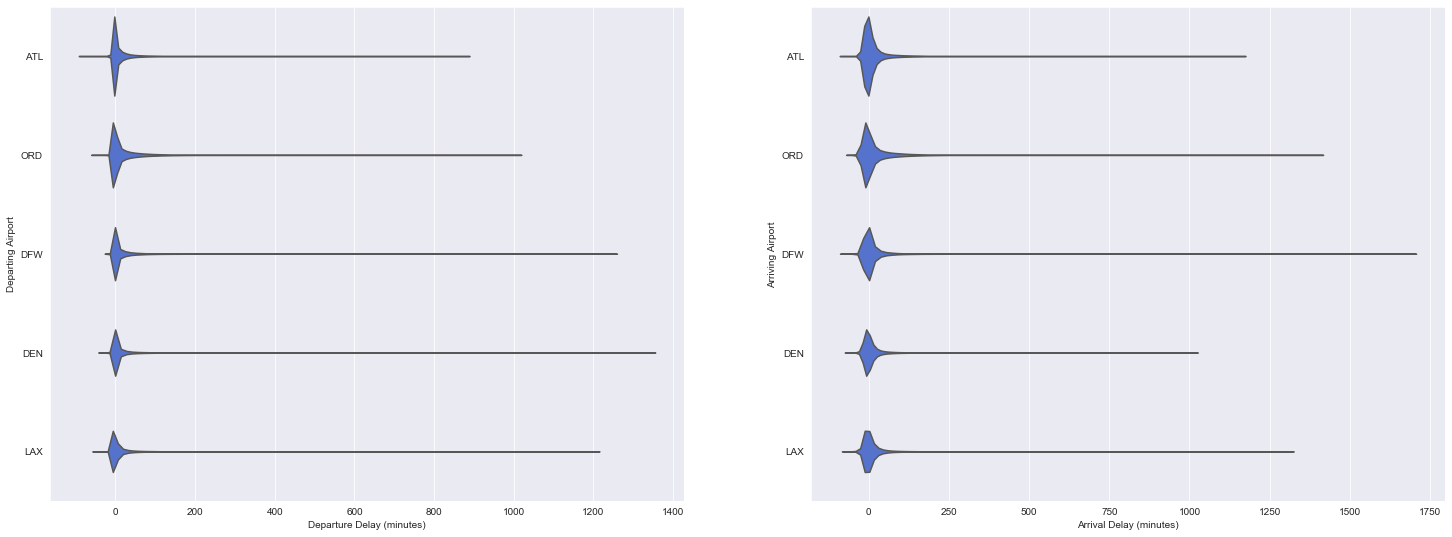

In [40]:
plt.figure(figsize = [25, 20])

plt.subplot(2, 2, 1)
sns.violinplot(data=df2, y='origin', x='depdelay', scale='count', inner=None, color='royalblue', cut=0, order=df2['origin'].value_counts().head().index)
plt.ylabel('Departing Airport')
plt.xlabel('Departure Delay (minutes)')
plt.rcParams['figure.figsize']=(15,8);

plt.subplot(2, 2, 2)
sns.violinplot(data=df2, y='dest', x='arrdelay', scale='count', inner=None, cut=0, color='royalblue', order=df2['dest'].value_counts().head().index)
plt.ylabel('Arriving Airport')
plt.xlabel('Arrival Delay (minutes)')
plt.rcParams['figure.figsize']=(15,8);

It looks like Orlando has the longest delay times, both for depatures, while Atlanta has the most delays for arrivals, though Orlando appears to have lower numbers of longer delays than Atlanta. 

In [41]:
# creates a dataframe containing only cancelled flights

df2_cancelled = df2[df2['cancelled'] == 1]

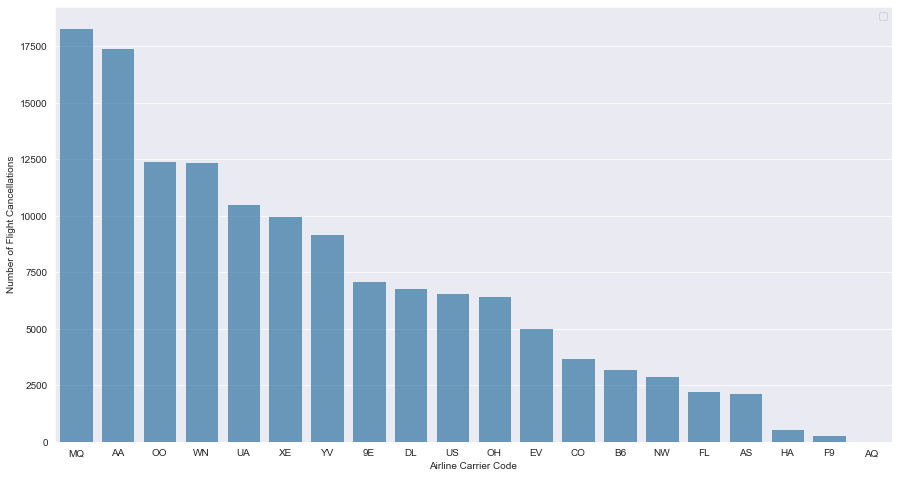

In [42]:
# creates a countplot with cancellations by carrier

sns.countplot(data=df2_cancelled, x='uniquecarrier', hue='cancelled', alpha=0.7, order=df2_cancelled['uniquecarrier'].value_counts().index)
plt.xlabel('Airline Carrier Code')
plt.ylabel('Number of Flight Cancellations')
plt.legend('')
plt.rcParams['figure.figsize']=(15,8);

American Eagle (MQ) has the most cancels of all airlines in the dataset, followed by American Airlines (AA), and SkyWest (OO) rounding out the top 3.